# Loading Tools and Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from ast import literal_eval

literal_eval : literal_eval works by parsing the input string and converting it into the corresponding Python literal object (like a list, dictionary, tuple, etc.). It uses Python's internal syntax rules to determine what kind of object the string represents. Importantly, it ensures the input string is a valid Python literal and raises an error if it's not.

# Import Dataset

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d spsayakpaul/arxiv-paper-abstracts


Dataset URL: https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts
License(s): CC0-1.0
 47% 21.0M/44.6M [00:00<00:00, 117MB/s] 
100% 44.6M/44.6M [00:00<00:00, 161MB/s]


In [4]:
!unzip arxiv-paper-abstracts.zip


Archive:  arxiv-paper-abstracts.zip
  inflating: arxiv_data.csv          
  inflating: arxiv_data_210930-054931.csv  


In [5]:

data = pd.read_csv("/content/arxiv_data_210930-054931.csv")

In [6]:
data.head()

,terms,titles,abstracts
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...


In [7]:
data.tail()

,terms,titles,abstracts
56176,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...
56177,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...
56178,['cs.LG'],Deep Reinforcement Learning with Double Q-lear...,The popular Q-learning algorithm is known to o...
56179,"['stat.ML', 'cs.LG', 'math.OC']",Generalized Low Rank Models,Principal components analysis (PCA) is a well-...
56180,"['cs.LG', 'cs.AI', 'stat.ML']",Chi-square Tests Driven Method for Learning th...,SDYNA is a general framework designed to addre...


In [8]:
data.shape

(56181, 3)

In [9]:
data = data.sample(frac = 0.2, random_state = 42) #use 30% of the data

In [10]:
data.shape

(11236, 3)

# Data Cleaning and preprocessing

In [11]:
data.isnull().sum()

,0
terms,0
titles,0
abstracts,0


In [12]:
labels_column = data['terms'].apply(literal_eval)
labels = labels_column.explode().unique()
print("labels :",labels)
print("lenght :",len(labels))


labels : ['cs.LG' 'cs.CV' 'eess.IV' 'stat.ML' 'math.OC' 'cs.CL' 'cs.MM' 'cs.AI'
 'cs.GR' 'econ.EM' 'cs.MA' 'cs.CR' '68T45' 'cs.RO' 'cs.DC' 'eess.SP'
 'cs.NE' 'stat.AP' 'math.ST' 'stat.TH' 'C.3; I.2; I.5' 'nlin.CD' 'cs.SI'
 'cs.HC' 'q-bio.NC' 'I.2.6; I.2.8; I.5.0; J.2; J.3' '68T45, 62F35' 'I.4'
 'cs.SY' 'eess.SY' 'cs.IR' 'I.4; I.5' 'cs.CY' 'I.4.6; J.2' 'cs.SD'
 'eess.AS' 'q-bio.QM' 'math.CA' 'math.DG' 'cs.DB' '68T07' 'I.5.0; I.2.0'
 'cs.CE' 'cs.AR' 'I.2.6; I.2.7; J.3' 'cs.IT' 'math.IT' 'I.4.8; I.2.6'
 '68T05' 'physics.chem-ph' 'quant-ph' 'cs.DS' '68U10' 'hep-ex' 'hep-ph'
 'physics.data-an' 'I.2' 'I.2.6' 'stat.CO' 'I.2; G.3' 'I.2.6; H.2.8'
 'I.2.0; I.2.6; H.5.2' 'cs.NA' 'math.NA' 'astro-ph.IM' '00' 'astro-ph.EP'
 'cs.CG' 'q-fin.GN' 'I.2.6; I.2.7' 'I.2.10' '68U10, 65K10, 65M06'
 'I.4; G.1.6; G.4' 'cond-mat.dis-nn' 'I.2.6; I.2.7; H.3.1; H.3.3' 'cs.PL'
 '68T07, 68T99' 'I.2.m' 'I.2.10; I.4; I.3' 'q-bio.MN' 'I.4.0; I.2.7'
 'physics.comp-ph' 'math.PR' 'physics.flu-dyn'
 '65D17, 68U05, 68U10, 5

In [13]:
data.duplicated().sum()

749

In [14]:
# reomove duplicates data based on the titles column
data = data.drop_duplicates(subset = "titles")
print(f"There are {len(data)} rows in the duplicated dataset")

There are 10485 rows in the duplicated dataset


In [15]:
#Count Rare Terms

print(sum(data['terms'].value_counts() == 1))


916


2,503 terms appear only once in the dataset.

In [16]:
#count the unique terms
print(data['terms'].nunique()) #nunique() counts the number of distinct values in the terms column.


1239


There are 3,401 unique terms.


In [17]:
#Filter rows with rare terms

#Applies a filter to retain only groups where the length (number of rows) is greater than 1 (i.e., terms that occur more than once).
data_filtered = data.groupby('terms').filter(lambda x: len(x) >1)
data_filtered

,terms,titles,abstracts
41761,"['cs.LG', 'cs.CV', 'eess.IV']",Comparing Different Deep Learning Architecture...,Chest radiographs are among the most frequentl...
30629,['cs.CV'],"TGHop: An Explainable, Efficient and Lightweig...","An explainable, efficient and lightweight meth..."
19240,"['cs.CV', 'cs.LG', 'eess.IV']",Unidentified Floating Object detection in mari...,Maritime domain is one of the most challenging...
36910,"['cs.LG', 'stat.ML']",Understanding Graph Neural Networks from Graph...,Graph neural networks (GNNs) have attracted mu...
5246,['cs.CV'],Self-Supervised Regional and Temporal Auxiliar...,Automatic facial action unit (AU) recognition ...
...,...,...,...
27727,"['cs.LG', 'cs.CV']",A Unified Generative Adversarial Network Train...,We propose a novel GAN training scheme that ca...
28880,"['cs.LG', 'cs.CV', 'stat.ML']",GRIm-RePR: Prioritising Generating Important F...,Pseudo-rehearsal allows neural networks to lea...
5341,['cs.CV'],DCVNet: Dilated Cost Volume Networks for Fast ...,"The cost volume, capturing the similarity of p..."
31363,"['stat.ML', 'cs.AI', 'cs.LG']",Understanding Black-box Predictions via Influe...,How can we explain the predictions of a black-...


In [18]:
#Convert string representation of list to Actual list
data_filtered['terms'] = data_filtered['terms'].apply(lambda x : literal_eval(x))
data_filtered['terms'].values[:3]

array([list(['cs.LG', 'cs.CV', 'eess.IV']), list(['cs.CV']),
       list(['cs.CV', 'cs.LG', 'eess.IV'])], dtype=object)

# Visualization

1. Distribution of Term Frequency

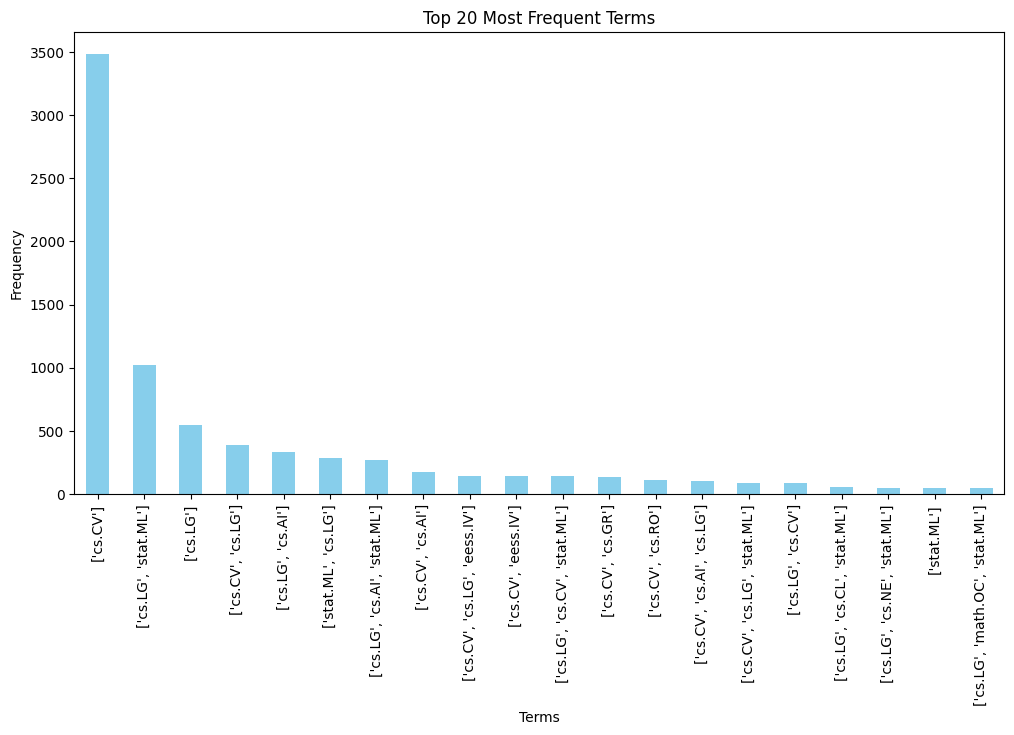

In [19]:
term_counts = data['terms'].explode().value_counts()

plt.figure(figsize = (12,6))
term_counts.head(20).plot(kind = "bar", color = 'skyblue')
plt.title("Top 20 Most Frequent Terms")
plt.xlabel('Terms')
plt.ylabel('Frequency')
# plt.xticks(rotation = 90)
plt.show()

2. Plot the number of papers per term in the filtered dataset

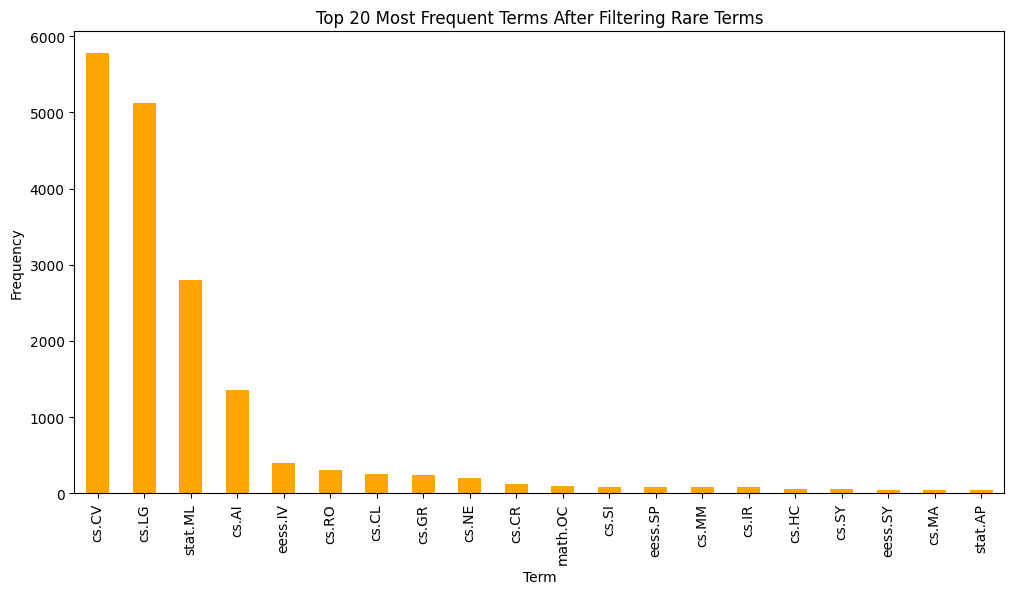

In [20]:
# Plot the number of papers per term in the filtered dataset
filtered_term_counts = data_filtered['terms'].explode().value_counts()

plt.figure(figsize=(12, 6))
filtered_term_counts.head(20).plot(kind='bar', color='orange')
plt.title('Top 20 Most Frequent Terms After Filtering Rare Terms')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


# Feature Extraction using Transformer Model (BERT)

### Convert the titles and abstracts of the papers into vector embeddings using a pre-trained model like BERT

In [21]:
!pip install transformers
!pip install torch

torch is the core library of PyTorch, an open-source machine learning framework developed by Facebook's AI Research lab. PyTorch is widely used for deep learning tasks, such as computer vision, natural language processing (NLP), and reinforcement learning.torch provides a powerful N-dimensional array called a tensor, similar to NumPy arrays, but with the added benefit of supporting GPU acceleration (using CUDA).

Tensors are the building blocks for deep learning models in PyTorch.

In [22]:
#Import necessary libraries
from transformers import DistilBertTokenizer, DistilBertModel
import torch

### Load Pre-trained Bert model and tokenizer

In [23]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [24]:
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [25]:
#Ensure the model is in evalueation mode
model.eval()

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

### Encode the Titles and Abstracts

In [26]:
# Define a function to get BERT embeddings
def get_bert_embedding(text):
    # Tokenize the text and convert it to input IDs
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)

    # Pass the inputs through the model to get the embeddings
    with torch.no_grad():  # Use no_grad() to disable gradient computation during inference
        outputs = model(**inputs)

    # Extract the embeddings (using the last hidden state)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze()  # Taking the mean over the sequence length
    return embeddings

# Batch Processing Function for Efficient Embedding Calculation
def get_embeddings_for_batch(data, column_name, batch_size=24):
    embeddings = []
    for i in range(0, len(data), batch_size):
        texts_batch = data[column_name].iloc[i:i+batch_size].tolist()
        embeddings_batch = [get_bert_embedding(text) for text in texts_batch]
        embeddings.extend(embeddings_batch)
        print(f"Processed {i + batch_size}/{len(data)} titles...")  # Show progress
    return embeddings

# Apply the function to extract embeddings for Titles and Abstracts
data['title_embeddings'] = get_embeddings_for_batch(data, 'titles')
data['abstract_embeddings'] = get_embeddings_for_batch(data, 'abstracts')
data['terms_embeddings'] = get_embeddings_for_batch(data, 'terms')



Processed 24/10485 titles...
Processed 48/10485 titles...
Processed 72/10485 titles...
Processed 96/10485 titles...
Processed 120/10485 titles...
Processed 144/10485 titles...
Processed 168/10485 titles...
Processed 192/10485 titles...
Processed 216/10485 titles...
Processed 240/10485 titles...
Processed 264/10485 titles...
Processed 288/10485 titles...
Processed 312/10485 titles...
Processed 336/10485 titles...
Processed 360/10485 titles...
Processed 384/10485 titles...
Processed 408/10485 titles...
Processed 432/10485 titles...
Processed 456/10485 titles...
Processed 480/10485 titles...
Processed 504/10485 titles...
Processed 528/10485 titles...
Processed 552/10485 titles...
Processed 576/10485 titles...
Processed 600/10485 titles...
Processed 624/10485 titles...
Processed 648/10485 titles...
Processed 672/10485 titles...
Processed 696/10485 titles...
Processed 720/10485 titles...
Processed 744/10485 titles...
Processed 768/10485 titles...
Processed 792/10485 titles...
Processed 816/

**Why Use torch.no_grad()?**

When performing inference, gradients aren't needed, so not computing them reduces memory usage and improves speed.
This makes the code more efficient during model evaluation or when making predictions on new data.
model(**inputs):

This is the syntax for calling the model in PyTorch. In the context of transformers or neural networks, inputs typically contains the input data (like a batch of images, text, or other features).
The **inputs syntax is used for unpacking the dictionary inputs and passing its values as keyword arguments to the model. For example, if inputs is a dictionary with keys like input_ids, attention_mask, etc. (common in transformer models), each of these will be passed as individual arguments to the model's forward function.

### Combine Title and Abstract Embeddings


In [27]:
# Combine Title , Abstract and terms  Embeddings into one vector
def combine_embeddings(row):
    # Convert embeddings to numpy arrays and concatenate them
    combined = np.concatenate([row['title_embeddings'].numpy(), row['abstract_embeddings'].numpy(), row['terms_embeddings'].numpy()])
    return combined

In [31]:
# Combine the embeddings into one column
data['combined_embeddings'] = data.apply(combine_embeddings, axis=1)


In [32]:

print(data[['titles', 'combined_embeddings']].head())

                                                  titles  \
41761  Comparing Different Deep Learning Architecture...   
30629  TGHop: An Explainable, Efficient and Lightweig...   
19240  Unidentified Floating Object detection in mari...   
36910  Understanding Graph Neural Networks from Graph...   
5246   Self-Supervised Regional and Temporal Auxiliar...   

                                     combined_embeddings  
41761  [-0.084701024, 0.18484142, -0.10303946, 0.0262...  
30629  [-0.47242996, -0.108740866, 0.1860377, 0.09455...  
19240  [-0.29679888, -0.028434275, -0.018730404, 0.04...  
36910  [-0.10676336, 0.014089434, -0.19762307, -0.018...  
5246   [-0.22149499, 0.07878046, -0.17967772, -0.0039...  


In [33]:
print(data.columns)  # List all column names to check if 'combined_embeddings' exists


Index(['terms', 'titles', 'abstracts', 'title_embeddings',
       'abstract_embeddings', 'terms_embeddings', 'combined_embeddings'],
      dtype='object')


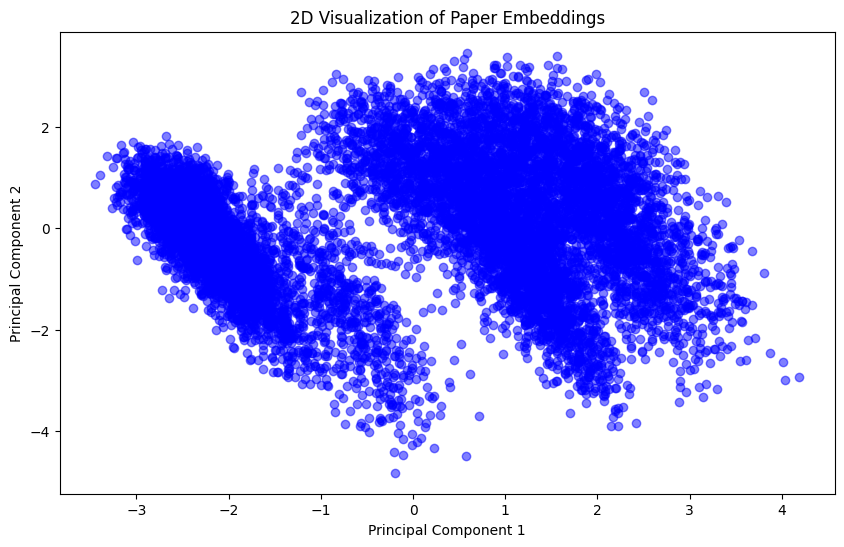

In [39]:
# Visualization: Embedding Distribution (2D)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(np.array(data['combined_embeddings'].tolist()))

plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', alpha=0.5)
plt.title("2D Visualization of Paper Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


## Calculate Cosine Similiraity



In [29]:
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
#Calculate cosine similarity between all paper embeddings
similarity_matrix = cosine_similarity(list(data['combined_embeddings']))

<ipython-input-48-eee3546488e1>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


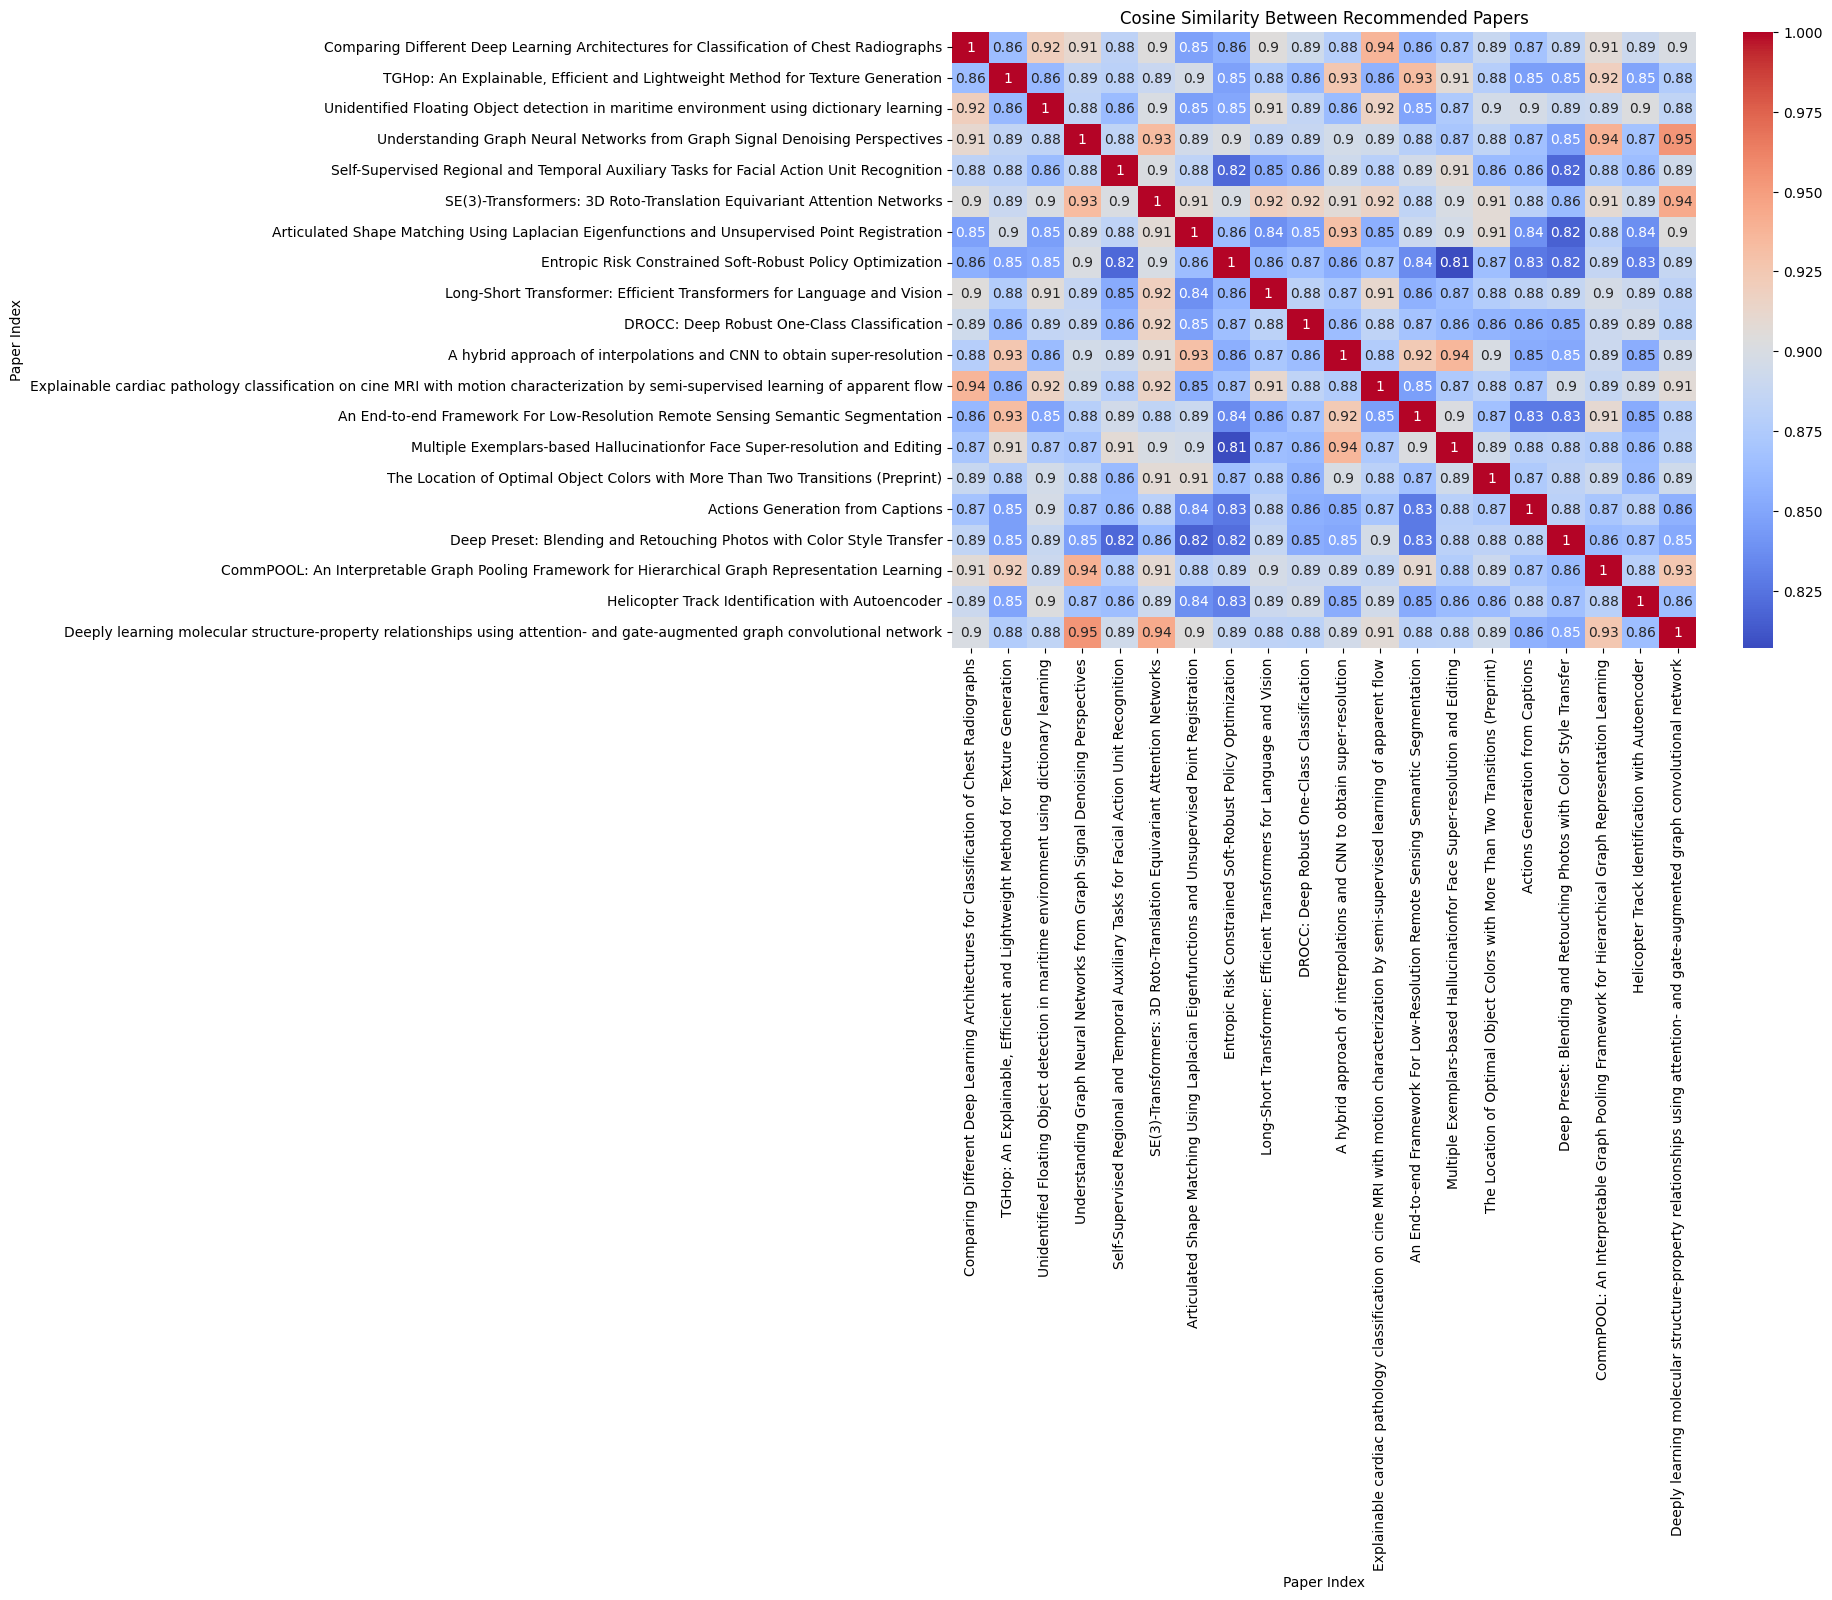

In [48]:
# Calculate cosine similarity for a small subset of papers for better visualization
subset_data = data.iloc[:20]  # Choose a subset of papers for easier visualization
similarity_matrix_subset = cosine_similarity(np.array(subset_data['combined_embeddings'].tolist()))

# Visualize the cosine similarity matrix
plt.figure(figsize=(12, 8))
sns.heatmap(similarity_matrix_subset, annot=True, cmap='coolwarm', xticklabels=subset_data['titles'], yticklabels=subset_data['titles'])
plt.title('Cosine Similarity Between Recommended Papers')
plt.xlabel('Paper Index')
plt.ylabel('Paper Index')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Prediction

In [37]:
#Define a funtion to get the top N most similar papers to a given paper
def get_recommendation(paper_index, top_n = 5) :
  similarity_scores =  similarity_matrix[paper_index]
  similar_papers = similarity_scores.argsort()[-top_n - 1 : -1][::-1] #Exclude paper itself
  return data.iloc[similar_papers][['titles', 'terms']]


In [38]:
#Get Recommendations for the first paper
recommended_papers = get_recommendation(0, top_n = 5)
print(recommended_papers)

                                                  titles  \
34200  Benchmarking CNN on 3D Anatomical Brain MRI: A...   
32119  Localization of Critical Findings in Chest X-R...   
37068  Comparing SNNs and RNNs on Neuromorphic Vision...   
29995  Generalization of Deep Neural Networks for Che...   
31725  Improving Explainability of Image Classificati...   

                                          terms  
34200             ['cs.CV', 'cs.LG', 'eess.IV']  
32119  ['cs.LG', 'cs.CV', 'eess.IV', 'stat.ML']  
37068             ['cs.CV', 'cs.NE', 'eess.IV']  
29995                        ['cs.CV', 'cs.NE']  
31725             ['cs.CV', 'cs.LG', 'eess.IV']  


# Question Answer system

In [49]:
from transformers import pipeline

In [50]:
# Load a question-answering pipeline
qa_pipeline = pipeline('question-answering', model='distilbert-base-uncased-distilled-squad', tokenizer='distilbert-base-uncased')

config.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

Device set to use cpu


In [58]:
# Function to answer a question based on a paper's title and abstract
def answer_question(query, paper_index) :
  #Extract the title and abstract of the paper
  paper = data.iloc[paper_index]
  title = paper['titles']
  abstract = paper['abstracts']

  #Combine titles and abstract into one context for question answer
  context = title + ' ' + abstract

  #use the QA model to answer the query based on the context
  result = qa_pipeline(question = query, context = context)

  return result ['answer']

In [59]:
# Function to answer a question based on a random  paper's
def process_random_paper(title, abstract, query):
    # Get embedding for the new paper
    title_embedding = get_bert_embedding(title)
    abstract_embedding = get_bert_embedding(abstract)
    terms_embedding = get_bert_embedding(" ".join(title.split()))  # Simplify using title as placeholder for terms (can be adjusted)

    # Combine embeddings
    new_paper_embedding = np.concatenate([title_embedding.numpy(), abstract_embedding.numpy(), terms_embedding.numpy()])

    # Create a DataFrame for the new paper (to be appended to the dataset)
    new_paper = pd.DataFrame({
        'titles': [title],
        'abstracts': [abstract],
        'terms': [["new", "paper", "terms"]],  # Adjust this based on your dataset structure
        'combined_embeddings': [new_paper_embedding]
    })

    # Append the new paper to the existing dataset
    global data
    data = pd.concat([data, new_paper], ignore_index=True)

    # Calculate cosine similarity with the entire dataset (including the new paper)
    all_embeddings = np.array(data['combined_embeddings'].tolist())
    similarity_matrix = cosine_similarity(all_embeddings)

    # Get the index of the newly uploaded paper (the last one)
    new_paper_index = len(data) - 1  # The last row index

    # Get top N similar papers to the new paper
    similar_papers = similarity_matrix[new_paper_index].argsort()[-6:-1][::-1]  # Exclude itself

    # Get recommendations for similar papers
    recommended_papers = data.iloc[similar_papers][['titles', 'terms']]

    # Answer the query for the new paper
    paper_answer = answer_question(query, new_paper_index)

    # Return recommendations and answers
    return recommended_papers, paper_answer


In [73]:
# Example usage with a random uploaded paper
uploaded_title = "Comparing Different Deep Learning Architecture."
uploaded_abstract = f"""Chest radiographs are among the most frequently acquired images in radiology
and are often the subject of computer vision research. However, most of the
models used to classify chest radiographs are derived from openly available
deep neural networks, trained on large image-datasets. These datasets routinely
differ from chest radiographs in that they are mostly color images and contain
several possible image classes, while radiographs are greyscale images and
often only contain fewer image classes. Therefore, very deep neural networks,
which can represent more complex relationships in image-features, might not be
required for the comparatively simpler task of classifying grayscale chest
radiographs. We compared fifteen different architectures of artificial neural
networks regarding training-time and performance on the openly available
CheXpert dataset to identify the most suitable models for deep learning tasks
on chest radiographs. We could show, that smaller networks such as ResNet-34,
AlexNet or VGG-16 have the potential to classify chest radiographs as precisely
as deeper neural networks such as DenseNet-201 or ResNet-151, while being less
computationally demanding."""
query = "What is the main focus of the paper?"

# Process the random paper
recommended_papers, paper_answer = process_random_paper(uploaded_title, uploaded_abstract, query)

# Print the recommended papers and the answer for the random paper
print("Recommended Papers:")
print(recommended_papers)

print("\nAnswer to your query:")
print(paper_answer)

Recommended Papers:
                                                  titles  \
10489    Comparing Different Deep Learning Architecture.   
10488    Comparing Different Deep Learning Architecture.   
10487    Comparing Different Deep Learning Architecture.   
6595   Predicting Stress in Remote Learning via Advan...   
2087   An Extensible Benchmark Suite for Learning to ...   

                                   terms  
10489                [new, paper, terms]  
10488                [new, paper, terms]  
10487                [new, paper, terms]  
6595   ['cs.LG', '68: computer science']  
2087        ['cs.LG', 'physics.comp-ph']  

Answer to your query:


'computer vision research'

In [65]:
data.iloc[0]

,0
terms,"['cs.LG', 'cs.CV', 'eess.IV']"
titles,Comparing Different Deep Learning Architecture...
abstracts,Chest radiographs are among the most frequentl...
title_embeddings,"[tensor(-0.0847), tensor(0.1848), tensor(-0.10..."
abstract_embeddings,"[tensor(-0.2427), tensor(0.1270), tensor(0.163..."
terms_embeddings,"[tensor(0.1424), tensor(0.1286), tensor(0.3247..."
combined_embeddings,"[-0.084701024, 0.18484142, -0.10303946, 0.0262..."


In [66]:
data['abstracts'][0]

'Chest radiographs are among the most frequently acquired images in radiology\nand are often the subject of computer vision research. However, most of the\nmodels used to classify chest radiographs are derived from openly available\ndeep neural networks, trained on large image-datasets. These datasets routinely\ndiffer from chest radiographs in that they are mostly color images and contain\nseveral possible image classes, while radiographs are greyscale images and\noften only contain fewer image classes. Therefore, very deep neural networks,\nwhich can represent more complex relationships in image-features, might not be\nrequired for the comparatively simpler task of classifying grayscale chest\nradiographs. We compared fifteen different architectures of artificial neural\nnetworks regarding training-time and performance on the openly available\nCheXpert dataset to identify the most suitable models for deep learning tasks\non chest radiographs. We could show, that smaller networks such

## Create Pickle file


In [69]:
import pickle

In [72]:
#Save model
def save_pickle(file_path, data):
  with open(file_path, 'wb') as file:
    pickle.dump(data, file)

# Save combined embeddings and data to pickle files
save_pickle('data_embeddings.pkl', data['combined_embeddings'])
save_pickle('data.pkl', data)
save_pickle('similarity_matrix.pkl', similarity_matrix)
